
---


## Analysis on vehicle emission

* Using data exploratory analysis
* Logistic regression

---



---

# Table of Contents

---


1. Introduction 
    - Summary of report's main goals
2. Getting Dataset 
3. Data Description
4. Getting the data ready
    - Setting up the fueltype1 data
    - Setting up the fueltype2 data
5. Plotting the Annual Petroleum Consumption in Barrels
    - Fueltype1 Annual Petroleum Consumption in Barrels
    - Fueltype2 Annual Petroleum Consumption in Barrels
    - Fuel types Normality Plots
6. Model Analysis
    - Finding High and Low number of Co2 emisison for fueltype1 
    - Comparative Analysis for Co2 fueltype1
    - Filtering the number of low co2 emissions
    - Model the Logistic Regression for co2
    - Distribution plots for co2 high and co2 high predicted values for fueltype1 vehicles
    - Finding High and Low number of Co2A emisison for fueltype2
    - Filtering the number of low co2A emissions
    - Model the Logistic Regression for co2A
7. Further exploratory analysis
8. Summary


# Introduction 


The data comes from the US Department of Energy and details the fuel economy from the year of 1984-2016.

[Fuel Economy Data](https://www.fueleconomy.gov/feg/download.shtml)

### Summary of report's main goals

The report attempted to convince the audience that fueltype1 Co2 emisions were higher than of fueltype2 Co2A emissions.  As well as, the report enhances on the fact that alternative fuel vehicles will have overall less annual petroleum consumption, fuel cost, and that combined miles per gallons (MPG) efficiency.

Below is a description of what fueltype1 and fueltype2 are:

* <span style="color:brown">**FuelType1**</span> vehicles are considered to be vehicles with a single fuel source.  This type of fuel type can be considered non-hybrid.

* <span style="color:green">**FuelType2**</span> are considered to be vehicles with a dual fuel source or with an alternative source (i.e. Electricity).  Yet, this vehicles would still used gasoline or diesel. This type can be considered hybrid vehicles.



# Getting the Dataset

In [1]:

# Importing our libraries 

import os as os
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

import statsmodels.api as sm
import sklearn as sk

from scipy import stats
import scipy.stats as sps
from scipy.stats import chi2_contingency
from math import log10, floor

import warnings
warnings.filterwarnings('ignore')

/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# loading Original Data

pd.set_option('display.max_columns', None)
df = pd.read_csv("V_Data.csv")
del df['Unnamed: 0']
df.head(2)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,trans_dscr,tCharger,sCharger,atvType,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb,efid,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,18.304342,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,493.722222,18,0.0,0,0.0,0.0,0.0,0.0,6.0,3.0,Rear-Wheel Drive,0,-1,1850,0,Premium,Premium Gasoline,-1,-1,22,0.0,0,0.0,0.0,0.0,0.0,0,0,19332,0,0,Acura,NSX,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic (S4),19.4,0.0,31.0,0.0,Two Seaters,2004,-4000,2MODE CLKUP,NaN,NaN,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
1,18.304342,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,493.722222,18,0.0,0,0.0,0.0,0.0,0.0,6.0,3.0,Rear-Wheel Drive,0,-1,1850,0,Premium,Premium Gasoline,-1,-1,22,0.0,0,0.0,0.0,0.0,0.0,0,0,19332,0,0,Acura,NSX,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic (S4),19.4,0.0,31.0,0.0,Two Seaters,2004,-4000,2MODE CLKUP,NaN,NaN,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV


In [3]:
#df.year = pd.to_datetime(df.year, format='%Y')
#df.year


The following data it's now simplyfied for the respected values associated with co2 emission and scores of greenhouse emission.


# Data Description:

Note each color for this data depicts the respectiver theme

- **<span style="color:Black">Year</span>** - year of car model 
- **<span style="color:Blue">barrels08</span>** - annual petroleum consumption in barrels for fuelType1 (1)
- **<span style="color:Blue">barrelsA08</span>**- annual petroleum consumption in barrels for fuelType2 (1)
- **<span style="color:Brown">co2</span>**- tailpipe CO2 in grams/mile for fuelType1 (5)
- **<span style="color:Brown">barrels0A8</span>**- tailpipe CO2 in grams/mile for fuelType2 (5)
- **<span style="color:Orange">barrels08</span>** - combined MPG for fuelType1 (2)
- **<span style="color:violet">barrelsA08</span>** - combined MPG for fuelType2 (2)
- **<span style="color:orange">fuelCost08</span>** - annual fuel cost for fuelType1 in dollars (7).
- **<span style="color:red">fuelCostA08</span>** - annual fuel cost for fuelType2 in dollars (7).

- **fuelType** - fuel type with fuelType1 and fuelType2 (if applicable)

Note: I found that on the index bottom page of the data description [Fuel Economy](http://www.fueleconomy.gov/feg/ws/index.shtml). For model year 2013 and beyond, tailpipe CO2 is based on EPA tests. For previous model years, CO2 is estimated using an EPA emission factor. -1 = Not Available.

Basically, we can treat a co2 emission value of -1 to be as a null value.





## Getting the Data ready

In [4]:

# summarizing our data for this study

data = df[['year', 'co2', 'co2A','barrels08','barrelsA08', 'fuelCost08', 'fuelCostA08','comb08','combA08','fuelType']]
print(data.shape)
data.head(3)


(29233, 10)


,year,co2,co2A,barrels08,barrelsA08,fuelCost08,fuelCostA08,comb08,combA08,fuelType
0,2004,-1,-1,18.304342,0.0,1850,0,18,0,Premium
1,2004,-1,-1,18.304342,0.0,1850,0,18,0,Premium
2,2004,-1,-1,18.304342,0.0,1850,0,18,0,Premium


In [5]:
data.dtypes # checking to see if all values are numerical 


year             int64
co2              int64
co2A             int64
barrels08      float64
barrelsA08     float64
fuelCost08       int64
fuelCostA08      int64
comb08           int64
combA08          int64
fuelType        object
dtype: object

In [6]:
data.describe()  # getting the descriptive statistics

,year,co2,co2A,barrels08,barrelsA08,fuelCost08,fuelCostA08,comb08,combA08
count,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000
mean,2010.336264,140.879828,14.095816,16.380897,0.385254,1444.889337,164.456265,21.592447,1.121712
std,3.757216,204.121630,85.050208,4.157619,1.497815,415.217779,639.081805,7.756348,5.849283
min,2004.000000,-1.000000,-1.000000,0.059892,0.000000,450.000000,0.000000,9.000000,0.000000
25%,2007.000000,-1.000000,-1.000000,13.733750,0.000000,1150.000000,0.000000,18.000000,0.000000
50%,2011.000000,-1.000000,-1.000000,15.689436,0.000000,1450.000000,0.000000,21.000000,0.000000
75%,2014.000000,340.000000,-1.000000,18.304342,0.000000,1650.000000,0.000000,24.000000,0.000000
max,2016.000000,847.000000,719.000000,36.608684,18.304342,3700.000000,3650.000000,124.000000,117.000000


### Setup of the FuelTypes Dataframe

After finding out that all the values registered as -1, we went ahead to deleting from our dataframe.  Therefore, reducing our sample size for the co2A emission values but still have a good substantial amount of data.

We did the same thing we did for the co2 type1 emission values.

In [7]:
# Setting up the dataframe. Deleting all the values of -1,0 from the dataframe
# so that both co2 and co2A would have the same sample size
# This way making a better model perhaps

Co2 = data[data['co2A'] >= 1]
print(Co2.shape)
Co2.head(2)



(935, 10)


,year,co2,co2A,barrels08,barrelsA08,fuelCost08,fuelCostA08,comb08,combA08,fuelType
18908,2013,425,428,15.689436,4.679378,1250,2050,21,16,Gasoline or E85
18923,2013,470,450,17.337486,5.348574,1350,2350,19,14,Gasoline or E85


In [8]:
Co2.describe()

,year,co2,co2A,barrels08,barrelsA08,fuelCost08,fuelCostA08,comb08,combA08
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2014.155080,489.321925,470.942246,18.138186,5.610812,1482.352941,2449.518717,19.073797,13.961497
std,1.041183,107.065571,102.748132,3.962818,1.264754,328.204550,528.134857,4.320400,3.143365
min,2013.000000,273.000000,266.000000,9.976196,0.097836,800.000000,1400.000000,12.000000,9.000000
25%,2013.000000,403.000000,384.000000,14.964294,4.679378,1300.000000,2050.000000,16.000000,12.000000
50%,2014.000000,476.000000,461.000000,17.337486,5.348574,1450.000000,2350.000000,19.000000,14.000000
75%,2015.000000,571.000000,542.000000,20.589638,6.242500,1700.000000,2700.000000,22.000000,16.000000
max,2016.000000,747.000000,719.000000,27.467500,8.320004,2350.000000,3650.000000,33.000000,23.000000


In [9]:
# checking is there is any missing value for Co2
Co2.co2.isnull().sum()

0

In [10]:
# checking is there is any missing value for Co2A
Co2.co2A.isnull().sum()

0

We can now see that there is not any -1 values in both co2 and co2A emissions.

## Plotting the Annual Petroleum Consumption in Barrels



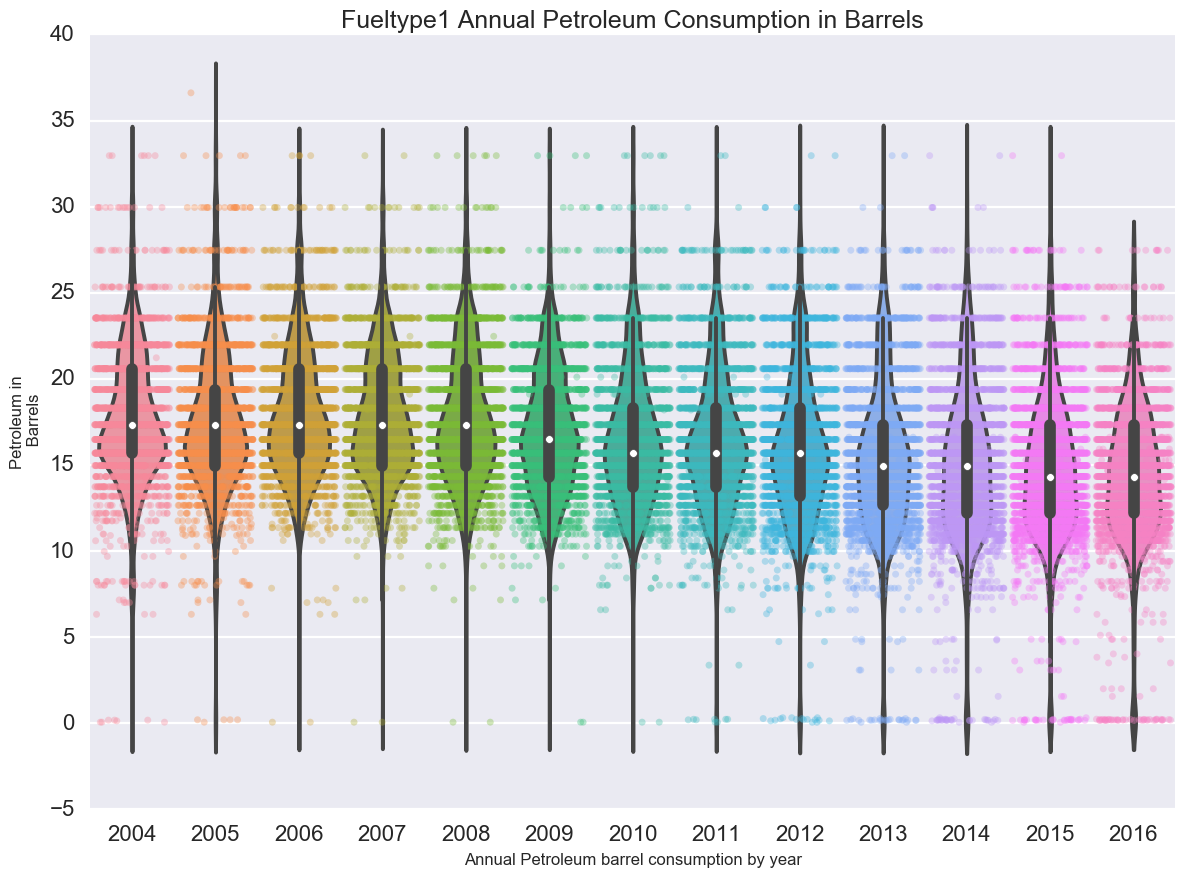

In [11]:

sns.set_context('poster')
f, ax = plt.subplots(figsize=(14, 10))
#sns.set(style ='palette="Set3", color_codes=True)

# BoxPlot of Annual Income by State:
sns.violinplot(x="year", y="barrels08", data=data, zorder=10)
                # whis=np.inf, color="orange")

# Add Points for each observation:
sns.stripplot(x="year", y="barrels08", data=data,
           jitter=0.45, size=5, alpha=0.35, zorder=2)

# Quantitative Axis logarithmic:
#ax.set_xscale("log")
#ax.set_yscale("log")
#sns.despine(trim=True)

#plt.grid()
plt.ylim(-5, 40)
plt.yticks(rotation = 0)
plt.title('Fueltype1 Annual Petroleum Consumption in Barrels', fontsize=18)
plt.xlabel('Annual Petroleum barrel consumption by year', fontsize=12)
plt.ylabel('Petroleum in\n Barrels', fontsize=12).set_rotation(90);


The graph above depicts the annual petroleum consumption in barrels for fueltype 1. As well as, this graph shows the annual petroleum consumption by year models from the year 2004 to 2016.  The mean is around 16.4 and it was the highest on the years from 2004-2008. Then, it experienced a decline and better fuel efficiency starting in the year 2009 and continue getting better.

## Plot of Fueltype2 Annual Petroleum Consumption in Barrels

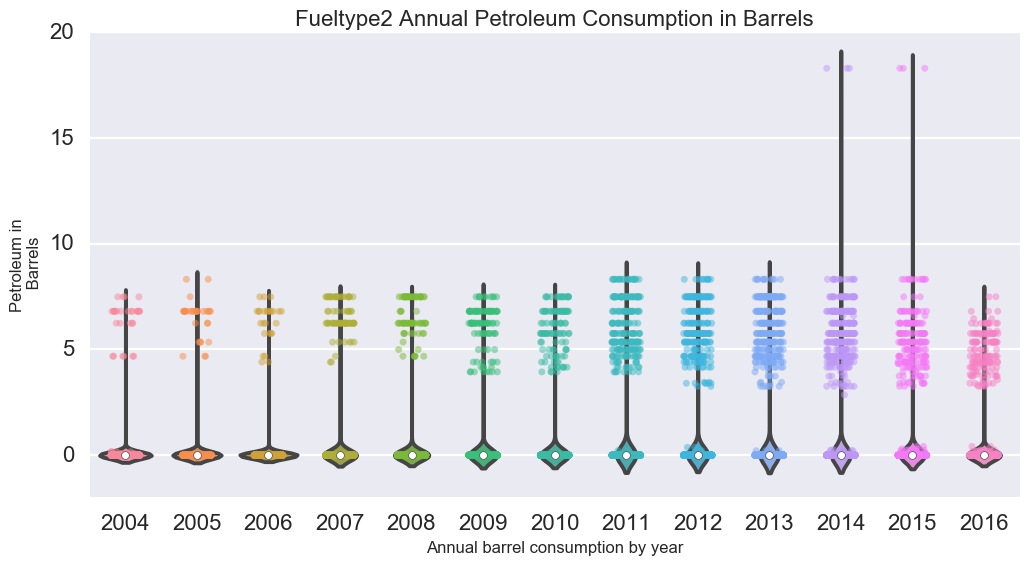

In [12]:
## ANNUAL INCOME, BY STATE:

sns.set_context('poster')
f, ax = plt.subplots(figsize=(12, 6))
#sns.set(style="ticks", palette="muted", color_codes=True)

# BoxPlot of Annual Income by State:
sns.violinplot(x="year", y="barrelsA08", data=data, zorder=10)
                # whis=np.inf, color="orange")

# Add Points for each observation:
sns.stripplot(x="year", y="barrelsA08", data=data,
           jitter=0.2, size=5, alpha=0.5, zorder=2)

# Quantitative Axis logarithmic:
#ax.set_xscale("log")
#ax.set_yscale("log")
#sns.despine(trim=True)

#plt.grid()
plt.title('Fueltype2 Annual Petroleum Consumption in Barrels', fontsize=16)
plt.xlabel('Annual barrel consumption by year', fontsize=12)
plt.ylim(-2, 20)
plt.ylabel('Petroleum in\n Barrels', fontsize=12).set_rotation(90);


The above plot displays the annual petroleum consumption in barrels for fueltype2. As well as, this graph shows the annual petroleum consumption by year models from the year 2004 to 2016.  According to this data, fueltype2 mean fuel consumption is about 0.4. Yet, there is a lot of outliers.  


## Fuel types  Normality Plots


When plotted the all the values for the fuel types the distribution did not look normal at all.
Thus, the 0 and -1 values were treated as outliers and were remove. Now, the below graph will have a somewhat improved normality. It only gets a mild away from normality and the distribution does follow a bell curve formed. 

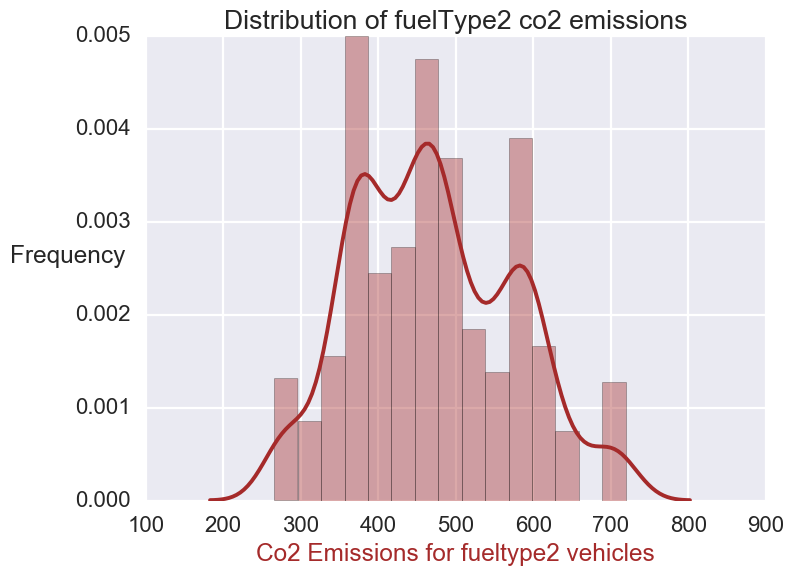

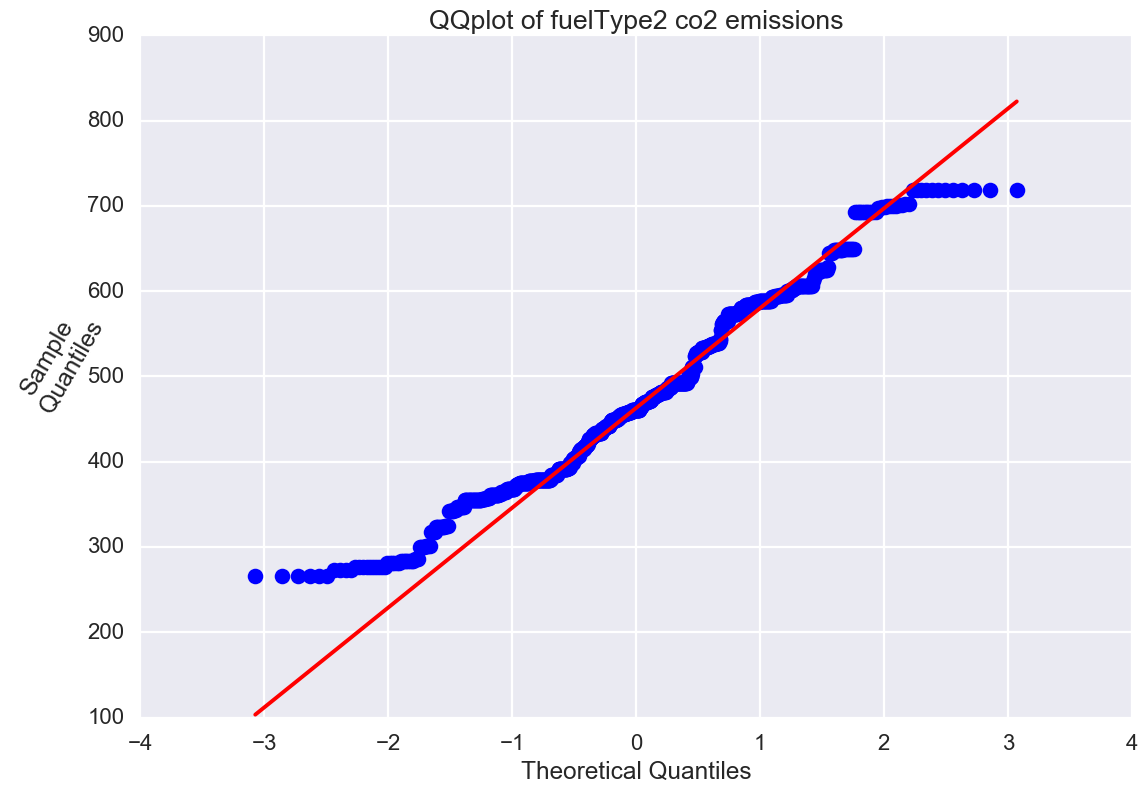

In [13]:
# plot of co2 emissions for fueltype 1 vehicles



plt.figure(figsize = (8,6))
sns.distplot(Co2['co2A'], color = 'brown')
plt.title("Distribution of fuelType2 co2 emissions")
plt.xlabel('Co2 Emissions for fueltype2 vehicles', color='brown')
plt.ylabel('Frequency').set_rotation(0)

# qqplot

sm.qqplot(Co2['co2A'], line='q')
plt.title("QQplot of fuelType2 co2 emissions")
plt.ylabel('Sample\n Quantiles').set_rotation(60)
#plt.grid()
plt.show()

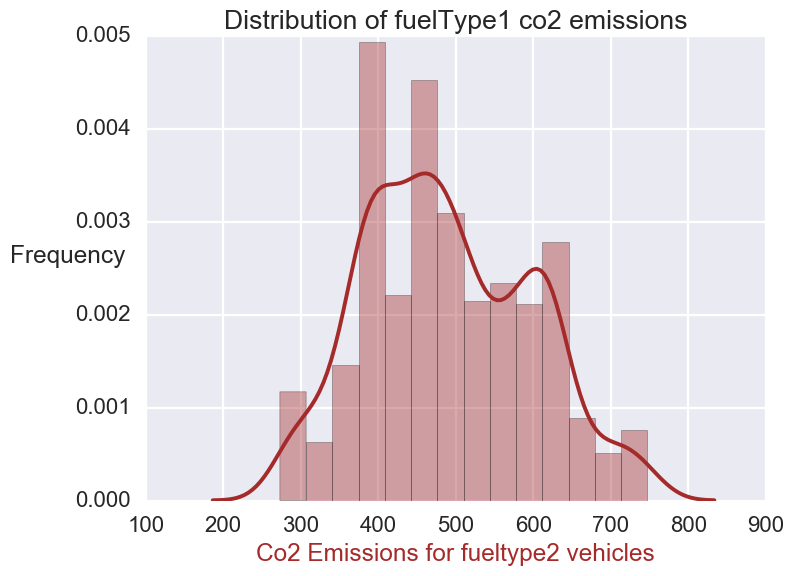

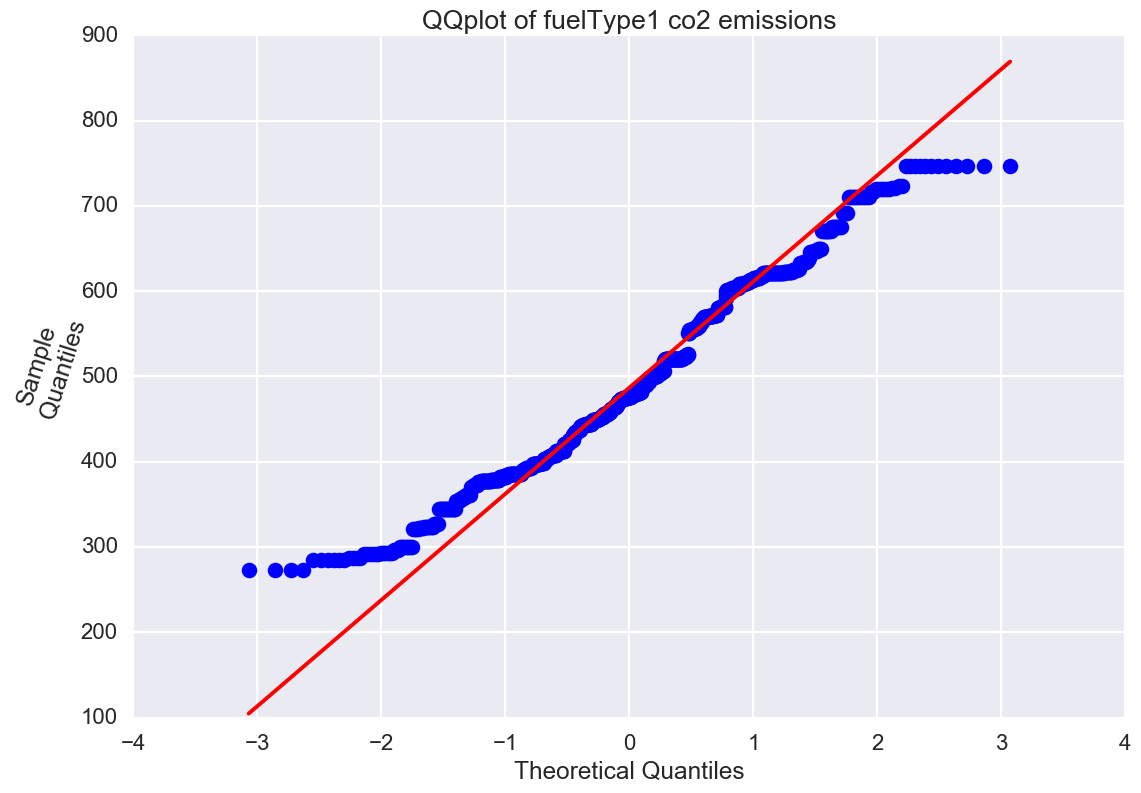

In [14]:

# graph for co2 emissions for type1 vehicles

# distribution plot

plt.figure(figsize = (8,6))
sns.distplot(Co2['co2'], color = 'brown')
plt.title("Distribution of fuelType1 co2 emissions")
plt.xlabel('Co2 Emissions for fueltype2 vehicles', color = 'brown')
plt.ylabel('Frequency').set_rotation(0)

# qqplot

sm.qqplot(Co2['co2'], line='q')
plt.title("QQplot of fuelType1 co2 emissions")
#plt.xlabel()
plt.ylabel('Sample\n Quantiles').set_rotation(72.5)

#plt.grid()
plt.show()

Now that we have achieved some type of normality in both of the fueltypes we can go ahead to see what the model tells us.

# Model Analysis

### Finding High and Low number of Co2 emisison for fueltype1

Let's start looking at what is considered high or low. This can be done by intuition.

In [15]:
# df it's the original plot

data_hi = df # renaminng the plot 

data.describe()  # this is just to visualize the parameters in examination


,year,co2,co2A,barrels08,barrelsA08,fuelCost08,fuelCostA08,comb08,combA08
count,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000
mean,2010.336264,140.879828,14.095816,16.380897,0.385254,1444.889337,164.456265,21.592447,1.121712
std,3.757216,204.121630,85.050208,4.157619,1.497815,415.217779,639.081805,7.756348,5.849283
min,2004.000000,-1.000000,-1.000000,0.059892,0.000000,450.000000,0.000000,9.000000,0.000000
25%,2007.000000,-1.000000,-1.000000,13.733750,0.000000,1150.000000,0.000000,18.000000,0.000000
50%,2011.000000,-1.000000,-1.000000,15.689436,0.000000,1450.000000,0.000000,21.000000,0.000000
75%,2014.000000,340.000000,-1.000000,18.304342,0.000000,1650.000000,0.000000,24.000000,0.000000
max,2016.000000,847.000000,719.000000,36.608684,18.304342,3700.000000,3650.000000,124.000000,117.000000




Note: On footnotes at the bottom of the page. [Fuel Economy](http://www.fueleconomy.gov/feg/ws/index.shtml). For model year 2013 and beyond, tailpipe CO2 is based on EPA tests. For previous model years, CO2 is estimated using an EPA emission factor. -1 = Not Available.

Basically, we can treat a co2 emission value of -1 to be as a null value.
And, estimating by the same token that co2A emission value of -1 also can be treated the same.





## Comparative Analysis for Co2 fueltype1 (Non-hybrid cars)

In [16]:
np.percentile(df['co2'], range(10,101))

array([  -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,    0. ,
        224. ,  271. ,  286. ,  295. ,  302. ,  310. ,  317. ,  324. ,
        333. ,  340. ,  345. ,  354. ,  361. ,  371. ,  377. ,  385. ,
        392. ,  401. ,  408. ,  413. ,  421. ,  427. ,  437. ,  446. ,
        457. ,  465. ,  476. ,  484. ,  498. ,  517.4,  537. ,  565. ,
        600. ,  633. ,  847. ])

In [17]:
#np.percentile(df['co2A'], range(10,101))

By looking at quantiles we can make an estimated guess that anything before the 25% quantile is considered low.  Let's say the cut off point is 403.  Anything that is above 332 will be considered a high number of fueltype1 co2 emission.

Median co2: -1.0 Median co2A: -1.0


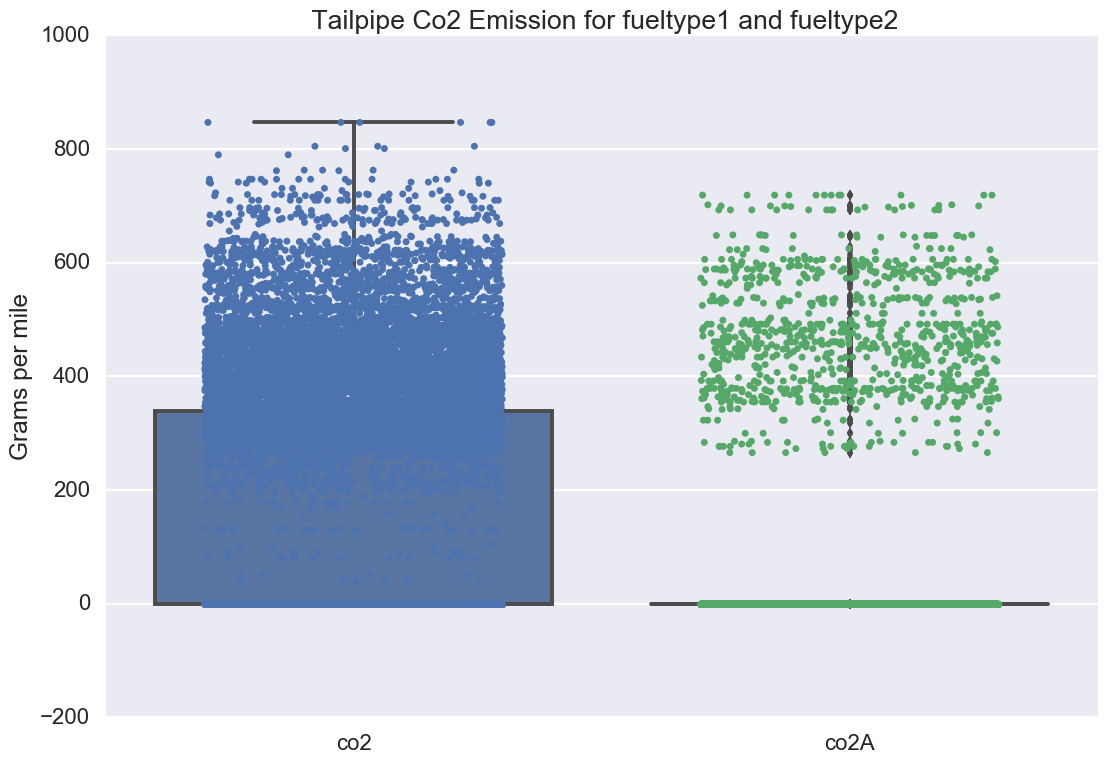

In [18]:
# comparing side by side the Co2 emissions for both fueltypes.

print("Median co2:", np.median(df.co2), "Median co2A:", np.median(df.co2A))

sns.boxplot(data = df[['co2','co2A']])
sns.stripplot(data = df[['co2','co2A']], jitter =0.3)
plt.title(' Tailpipe Co2 Emission for fueltype1 and fueltype2') 
plt.ylabel('Grams per mile')

By simply eyeballing this graph we can conclude that co2 does indeed emmits more than co2A.

In [19]:

# grabbing our four columns of interest 
data_hi = df[['co2','barrels08','fuelCost08', 'comb08',]]
data_hi.describe()

,co2,barrels08,fuelCost08,comb08
count,29233.000000,29233.000000,29233.000000,29233.000000
mean,140.879828,16.380897,1444.889337,21.592447
std,204.121630,4.157619,415.217779,7.756348
min,-1.000000,0.059892,450.000000,9.000000
25%,-1.000000,13.733750,1150.000000,18.000000
50%,-1.000000,15.689436,1450.000000,21.000000
75%,340.000000,18.304342,1650.000000,24.000000
max,847.000000,36.608684,3700.000000,124.000000


In [20]:
np.percentile(data_hi['co2'], range(25,101))

array([  -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
         -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,   -1. ,
          0. ,  224. ,  271. ,  286. ,  295. ,  302. ,  310. ,  317. ,
        324. ,  333. ,  340. ,  345. ,  354. ,  361. ,  371. ,  377. ,
        385. ,  392. ,  401. ,  408. ,  413. ,  421. ,  427. ,  437. ,
        446. ,  457. ,  465. ,  476. ,  484. ,  498. ,  517.4,  537. ,
        565. ,  600. ,  633. ,  847. ])

What it's low? anything before the 25%?  or it's an estimated cut-off point where one would make an estimated guess.  In this case I will choose 340.

In [21]:
data_hi['co2_high'] = data_hi.co2 > 334
data_hi.co2_high.value_counts()

False    21718
True      7515
Name: co2_high, dtype: int64

I chose 565 because this number would give me 872 true values.  In order to have about the same sample size with co2A.

### Filtering the number of low co2 emissions.

In [22]:
df_low_cnt = int(len(data_hi[data_hi['co2_high']]) * .3)
df_low_indices = np.random.choice(data_hi[~data_hi['co2_high']].index, size=df_low_cnt, replace=False)
len(df_low_indices)

2254

In [23]:
df_hi_subset = data_hi.iloc[np.concatenate((df_low_indices, data_hi[data_hi['co2_high']].index))]

In [24]:
# Controling for the -1 values that make up for more 50% of our data before we plot our model
df_hi_subset = df_hi_subset[(df_hi_subset.co2 > 200 )]
df_hi_subset.head()

#df_hi_subset.drop(['co2_high', 'co2'], axis=1).head()

,co2,barrels08,fuelCost08,comb08,co2_high
25264,288,10.613442,850,31,False
28220,330,12.195570,1250,27,False
27196,332,12.657024,1000,26,False
20730,211,7.844718,600,42,False
25203,269,9.976196,800,33,False


In [25]:
# Controlling for the -1 values that make up for more 50% of our data before we plot our model
data_hi= data_hi[(data_hi.co2 >= 200 )]
data_hi.head()

,co2,barrels08,fuelCost08,comb08,co2_high
18852,471,17.337486,1750,19,True
18853,471,17.337486,1750,19,True
18854,349,13.184400,1350,25,True
18855,349,13.184400,1350,25,True
18856,429,15.689436,1600,21,True


In [26]:
# normalizing our data

data_hi = pd.get_dummies(data_hi)
df_hi_subset = pd.get_dummies(df_hi_subset)
data_hi.co2_high.value_counts()

True     7515
False    2529
Name: co2_high, dtype: int64

### Model the Logistic Regression

In [27]:
from sklearn import linear_model

# Naming our model
Model = linear_model.LogisticRegression(C=18)

# create the linear regression model

Model.fit(df_hi_subset.drop(['co2_high', 'co2'], axis=1), df_hi_subset['co2_high']) # x and Y for the model
data_hi['co2_High_pred'] = Model.predict(data_hi.drop(['co2_high', 'co2'], axis=1))

In [28]:
# checking the count of our values

data_hi[['co2_high', 'co2_High_pred']].apply(pd.value_counts)

,co2_high,co2_High_pred
True,7515,7940
False,2529,2104



We can see from the confusion matrix that it's predicting co2_high and co2_high_prediction more than what is predicting falsely.


###  Distribution plots for co2 high and co2 high predicted values for fueltype1 vehicles


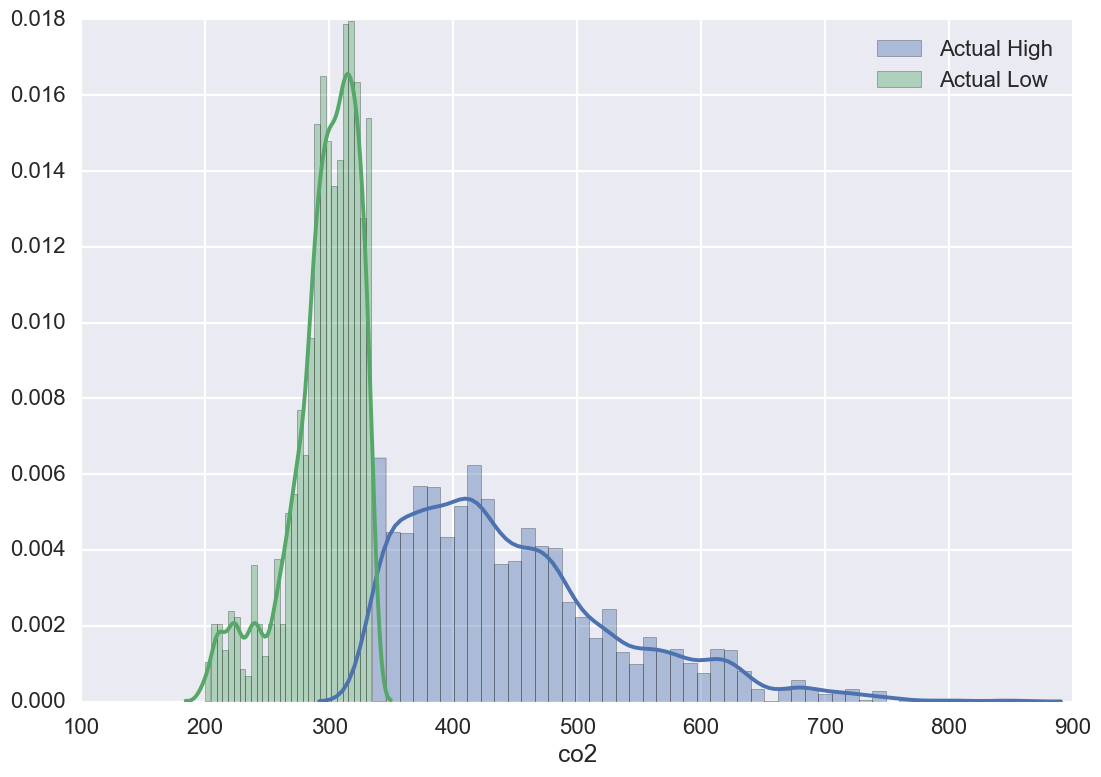

In [29]:
# Actual Values

sns.set_context("poster")

plot_high = sns.distplot(data_hi[data_hi['co2_high']].co2, label="Actual High")
plot_low = sns.distplot(data_hi[~data_hi['co2_high']].co2, label="Actual Low")
#ax.set_title('fuelType Average Tailpipe Co2 Emmission Normalized')
plt.legend()
plt.show()

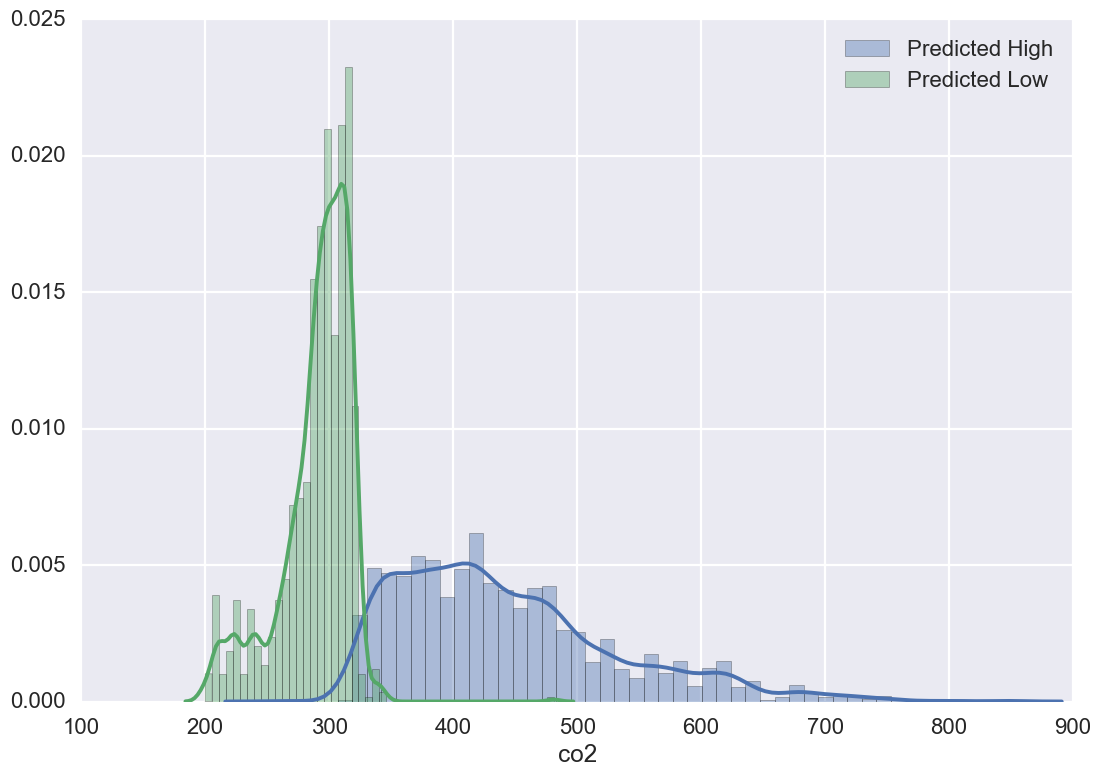

In [30]:
# predicted values

plot_high = sns.distplot(data_hi[data_hi['co2_High_pred']].co2, label="Predicted High")
plot_low = sns.distplot(data_hi[~data_hi['co2_High_pred']].co2, label="Predicted Low")
plt.legend()
plt.show()

### Finding High and Low number of Co2A emisison for fueltype2

In [31]:
df.head(2)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,trans_dscr,tCharger,sCharger,atvType,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb,efid,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,18.304342,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,493.722222,18,0.0,0,0.0,0.0,0.0,0.0,6.0,3.0,Rear-Wheel Drive,0,-1,1850,0,Premium,Premium Gasoline,-1,-1,22,0.0,0,0.0,0.0,0.0,0.0,0,0,19332,0,0,Acura,NSX,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic (S4),19.4,0.0,31.0,0.0,Two Seaters,2004,-4000,2MODE CLKUP,NaN,NaN,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,4HNXV03.2MJE,3,1.0,-1.0,-1,B9,BIN 9
1,18.304342,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,493.722222,18,0.0,0,0.0,0.0,0.0,0.0,6.0,3.0,Rear-Wheel Drive,0,-1,1850,0,Premium,Premium Gasoline,-1,-1,22,0.0,0,0.0,0.0,0.0,0.0,0,0,19332,0,0,Acura,NSX,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic (S4),19.4,0.0,31.0,0.0,Two Seaters,2004,-4000,2MODE CLKUP,NaN,NaN,NaN,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,4HNXV03.2MJE,7,1.0,-1.0,-1,L1,LEV


In [32]:
data_hi2 = df[['co2A','barrels08','fuelCost08', 'comb08']]
data_hi2.describe()

,co2A,barrels08,fuelCost08,comb08
count,29233.000000,29233.000000,29233.000000,29233.000000
mean,14.095816,16.380897,1444.889337,21.592447
std,85.050208,4.157619,415.217779,7.756348
min,-1.000000,0.059892,450.000000,9.000000
25%,-1.000000,13.733750,1150.000000,18.000000
50%,-1.000000,15.689436,1450.000000,21.000000
75%,-1.000000,18.304342,1650.000000,24.000000
max,719.000000,36.608684,3700.000000,124.000000


In [33]:
np.percentile(data_hi2.co2A, range(95,100))

array([  -1.  ,   -1.  ,  325.  ,  434.  ,  527.04])

In [34]:
data_hi2['co2A_high'] = data_hi2.co2A > 300
data_hi2.co2A_high.value_counts()

False    28339
True       894
Name: co2A_high, dtype: int64

### Filtering the number of low co2A emissions.

In [35]:
df2_low_cnt = int(len(data_hi2[data_hi2['co2A_high']]) * .95)
df2_low_indices = np.random.choice(data_hi2[~data_hi2['co2A_high']].index, size=df_low_cnt, replace=False)
len(df2_low_indices)

2254

In [36]:
df2_hi_subset = data_hi2.iloc[np.concatenate((df2_low_indices, data_hi2[data_hi2['co2A_high']].index))]

In [37]:
df2_hi_subset['co2A_high'].value_counts()

False    2254
True      894
Name: co2A_high, dtype: int64

In [38]:
df2_hi_subset.drop(['co2A_high', 'co2A'], axis=1).head()

,barrels08,fuelCost08,comb08
4841,16.480500,1300,20
7320,14.964294,1500,22
12219,13.184400,1050,25
17905,25.336022,2550,13
7136,19.381068,1500,17


In [39]:
#df2_hi_subset['co2A_high'].value_counts()

### Model the Logistic Regression

In [40]:
from sklearn import linear_model

Model = linear_model.LogisticRegression(C=10)
Model.fit(df2_hi_subset.drop(['co2A_high', 'co2A'], axis=1), df2_hi_subset['co2A_high']) # x and Y for the model
data_hi2['co2A_High_pred'] = Model.predict(data_hi2.drop(['co2A_high', 'co2A'], axis=1))

In [41]:
data_hi2[['co2A_high', 'co2A_High_pred']].apply(pd.value_counts)

,co2A_high,co2A_High_pred
False,28339,26290
True,894,2943


We can see from the confusion matrix that it's predicting co2A_high and co2A_high_prediction falsely.  

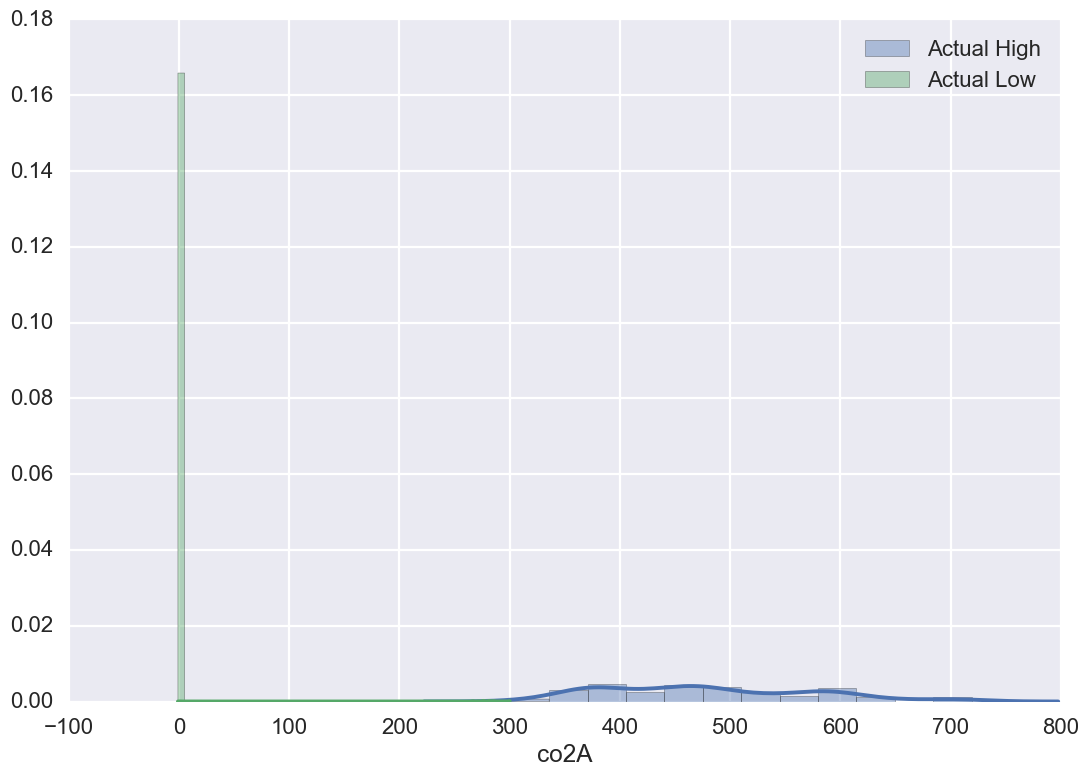

In [42]:
sns.set_context("poster")

plot_high = sns.distplot(data_hi2[data_hi2['co2A_high']].co2A, label="Actual High")
plot_low = sns.distplot(data_hi2[~data_hi2['co2A_high']].co2A, label="Actual Low")
#ax.set_title('fuelType Average Tailpipe Co2 Emmission Normalized')
plt.legend()
plt.show()

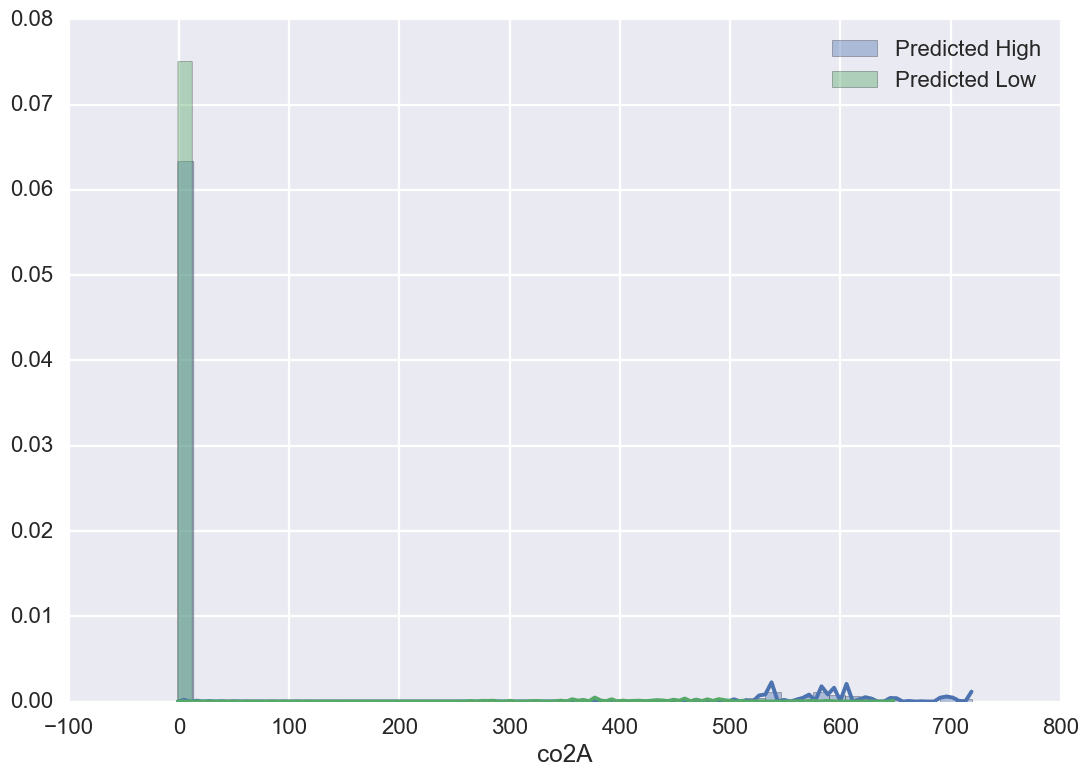

In [43]:
sns.set_context("poster")

plot_high = sns.distplot(data_hi2[data_hi2['co2A_High_pred']].co2A, label="Predicted High")
plot_low = sns.distplot(data_hi2[~data_hi2['co2A_High_pred']].co2A, label="Predicted Low")
plt.legend()
plt.show()

The model is wrongly predicting more false values than accurately predicting true values for the cO2 Model. it's predicting a lot of low values but also some high values.  Does this means that co2A emission are less than co2 emissions?

Let's find out why by digging more into the data.

In [44]:
# This are all the fueltypes in this dataset

pd.unique(df.fuelType)

array(['Premium', 'Regular', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Premium or E85', 'Midgrade', 'Electricity',
       'Premium Gas or Electricity', 'Regular Gas and Electricity',
       'Premium and Electricity', 'Regular Gas or Electricity'], dtype=object)

In [45]:
# amount of fuel type count

data.fuelType.value_counts()

Regular                        15107
Premium                        11455
Gasoline or E85                 1657
Diesel                           384
Premium or E85                   202
Midgrade                         143
Electricity                      141
Premium Gas or Electricity        39
CNG                               36
Premium and Electricity           28
Regular Gas and Electricity       27
Gasoline or natural gas           10
Regular Gas or Electricity         4
Name: fuelType, dtype: int64

In [46]:
# This are the fueltype 1 that contributed to the co2 emissions from the 
# logistic analysis

pd.unique(df.fuelType1)

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel', 'Natural Gas',
       'Midgrade Gasoline', 'Electricity'], dtype=object)

In [47]:
# fueltype 1 amount

pd.value_counts(df.fuelType1)

Regular Gasoline     16805
Premium Gasoline     11724
Diesel                 384
Midgrade Gasoline      143
Electricity            141
Natural Gas             36
Name: fuelType1, dtype: int64

In [48]:
# The total count of fueltyp1 values

pd.value_counts(df.fuelType1).sum()

29233

In [49]:
# Tried to look at what fueltype2 is but I got nothing.

#pd.unique(df.fuelType2)

We can see what fueltype1 is composed of.  According to this data fueltype1 are  vehicles who use: 'Premium Gasoline', 'Regular Gasoline', 'Diesel', 'Natural Gas','Midgrade Gasoline', 'Electricity']

So, we can assume that the other remaining values from fueltypes must be fueltype2. They are: 'Premium Gas or Electricity', 'Regular Gas and Electricity','Premium and Electricity' and'Regular Gas or Electricity.'  They are hybrid cars!

In [50]:
# Finding the count of hybrid cars (fueltype2) and non-hybrid cars (fueltype1)

Hybrids = df.atvType == "Hybrid"
Hybrids.value_counts()

False    28355
True       878
Name: atvType, dtype: int64

There is about 878 hybrid cars and about 28355 non-hybrid cars.  We might conclude from here that this is the reason why there is more co2 emission for fuel type1 vehicles.  Let's look further.

In [51]:
# dropping this columns to visualize the co2 and other important variables 
# for this study


df.drop(['charge240', 'city08' ,'city08U', 'cityA08', 'cityA08U','cityCD', 'cityE', 'cityUF',],1, inplace=True)



In [52]:
Fuel_Type = df.groupby('fuelType').sum()
print(Fuel_Type.shape)
Fuel_Type.head(14)

(13, 56)


,barrels08,barrelsA08,charge120,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb,salesArea,score,scoreAlt,smartwayScore
fuelType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CNG,3.639772,0.000000,0.0,2242,-36,0.000000,1.369235e+04,827,299.5416,0,0.0000,0.0000,0.0000,0.0000,192.0,108.6,288,22,61050,0,36,-36,1016,366.8722,0,0.0000,0.0000,0.0000,0.0000,0,0,975449,0,136,0.0,0,2034,0,0.0000,0.0000,0.0000,0.000,925.7928,0.0000,1427.9000,0.0000,72315,-116250,0.0,0,0,0,208,244.0,-36.0,24
Diesel,5326.333992,0.000000,0.0,86092,-380,0.000000,1.418912e+05,11010,8174.6474,0,0.0000,0.0000,0.0000,0.0000,1904.0,959.6,81047,1536,413050,0,1334,-384,13448,10001.5401,0,0.0000,0.0000,0.0000,0.0000,914,5052,12387513,124,3320,0.0,1150,16929,0,0.0000,0.0000,0.0000,0.000,12358.9185,0.0000,19089.2395,0.0000,772852,-49250,0.0,0,0,0,1830,1899.0,-384.0,-120
Electricity,28.974000,0.000000,0.0,0,-141,0.000000,0.000000e+00,14238,13495.6850,0,0.0000,4825.9628,0.0000,0.0000,NaN,0.0,35300,1212,93850,0,1212,-141,13395,12714.0956,0,0.0000,0.0000,5083.7448,0.0000,1712,7448,4943346,0,504,0.0,0,2600,18043,18172.5468,0.0000,17426.5242,0.000,21129.0714,0.0000,18661.3572,0.0000,284026,271000,221.0,0,0,0,679,1410.0,-141.0,282
Gasoline or E85,31860.234444,9829.695194,0.0,383792,368223,817802.217087,8.591287e+05,29727,19311.9196,21870,13804.6663,0.0000,0.0000,0.0000,11522.0,7444.2,481800,2172,2491050,4275250,2172,2327,36733,23907.3137,26887,17142.9241,0.0000,0.0000,0.0000,1148,4835,51399785,295,5049,0.0,1954,30800,0,0.0000,0.0000,0.0000,0.000,32198.8065,23479.0249,51212.8300,37374.5686,3333519,-3756000,0.0,0,0,0,7792,8277.0,489.0,-1307
Gasoline or natural gas,203.259500,1.201064,0.0,1742,1366,4459.072480,5.450917e+03,176,79.3520,168,74.2344,0.0000,0.0000,0.0000,64.0,40.4,4,12,16000,20200,12,18,214,100.8584,208,95.8572,0.0000,0.0000,0.0000,0,0,268234,0,54,0.0,0,604,0,0.0000,0.0000,0.0000,0.000,190.3350,178.6514,306.8814,294.5010,20086,-27500,0.0,0,0,0,71,25.0,-3.0,-10
Midgrade,2771.910230,0.000000,0.0,54594,-143,0.000000,7.484668e+04,2448,2233.2816,0,0.0000,0.0000,0.0000,0.0000,1140.0,810.9,43381,329,249800,0,329,-143,3169,2881.2302,0,0.0000,0.0000,0.0000,0.0000,0,0,4832569,224,702,0.0,1310,4644,0,0.0000,0.0000,0.0000,0.000,2555.8468,0.0000,4366.9418,0.0000,287948,-498250,0.0,0,0,0,709,850.0,-143.0,-139
Premium,196897.455676,0.000000,0.0,1795655,-11435,0.000000,5.308545e+06,230460,117663.5607,0,0.0000,0.0000,0.0000,0.0000,73569.0,40917.1,1253150,13645,19843550,0,13645,-11455,284918,145015.2815,0,0.0000,0.0000,0.0000,0.0000,14201,67989,330427250,26055,75277,0.0,231282,471030,0,0.0000,0.0000,0.0000,0.000,250572.1232,0.0000,396178.7911,0.0000,23029905,-39079000,0.0,0,0,0,57439,56379.0,-11455.0,-8122
Premium Gas or Electricity,165.021697,9.672000,0.0,4329,-39,0.000000,4.329000e+03,1283,1210.8274,3410,3232.8232,1612.2000,0.0000,24.7278,160.0,63.8,7382,315,41200,31600,323,-39,1350,1268.5041,3259,3088.9520,0.0000,1658.0000,24.2966,270,1350,1356592,110,104,0.0,830,682,0,0.0000,1590.5458,0.0000,1435.088,1692.7162,5215.3566,1883.7392,4792.5142,78560,30750,0.0,2262,2172,2216,193,257.0,-39.0,43
Premium and Electricity,231.380421,226.156408,0.0,7316,-28,0.000000,7.316000e+03,718,724.0530,1538,1541.0212,1226.0000,32.5966,10.8348,146.0,69.4,6580,199,38700,0,226,-28,788,791.7036,1648,1651.4592,25.6286,1202.0000,10.7750,56,356,1016440,30,114,28.0,486,872,0,0.0000,448.9600,0.0000,444.200,885.7046,2112.9596,1152.3556,2358.7894,56427,-35000,0.0,828,958,876,144,171.0,-28.0,18


### Plots of the Co2 and Co2A emissions

The two below plots reveal the co2 emission for both fueltypes.

We can see two peak points that influenced the co2 emission come from the premium and regular fueltype.

Also, we can see on the other plot that the value with the highest contribution to the co2A emission it's natural gasoline or natural gas.

But, let's read the summary to see why it's this.

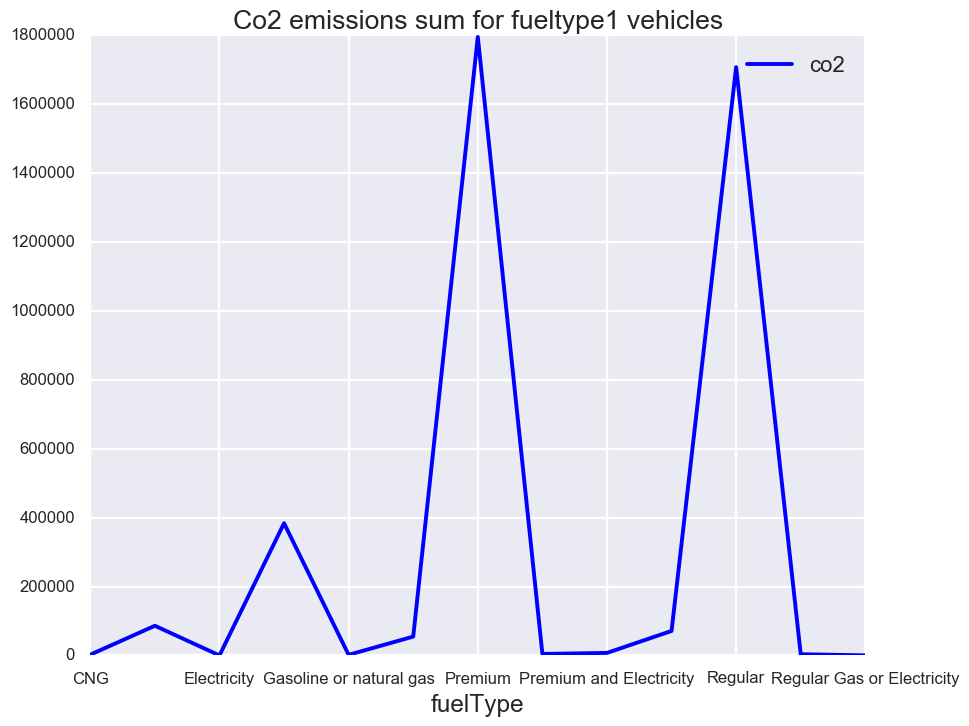

In [53]:
#  Plotting the cO2 emission for fueltype1

Fuel_Type[[3]].plot(title='Co2 emissions sum for fueltype1 vehicles',
                           fontsize=12,color='b',figsize=(10,8))

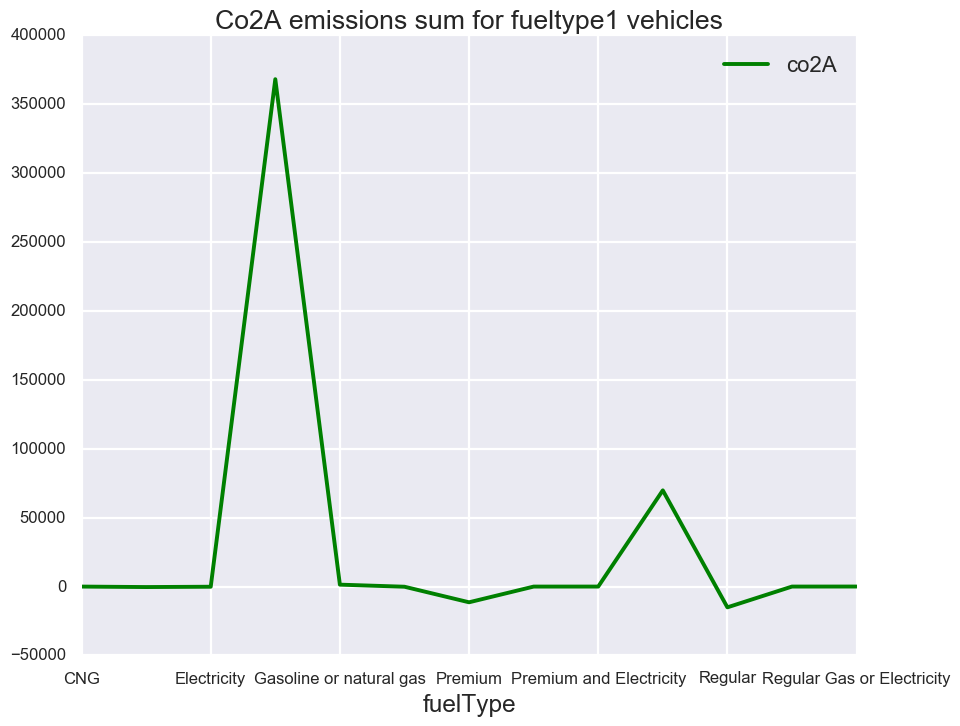

In [54]:
Fuel_Type[[4]].plot(title= 'Co2A emissions sum for fueltype1 vehicles',
                           fontsize=12, color='green',
                           figsize=(10,8))

# Summary

From the table above we can see that this table does differentiate correctly the different fueltypes.  It puts nicely which fueltype belongs to co2 or to co2A. This helps in getting a descriptive conclusion and does confirms why some co2A emission are label as -1. As mentioned before, according to the description of the data, -1 values are data points not found.  But, if we can see from the pd.value count for fueltype1, we can see 36 total counts for CNG and therefore it makes sense since there is 36 values that fit to co2, to not give it a -1 value because it does not belong to the co2A emission category. 

Recalling that this are fueltype2 vehicles: 'Premium Gas or Electricity', 'Regular Gas and Electricity','Premium and Electricity' & 'Regular Gas or Electricity.  This vehicles are hybrid and some of them are using more then other type of fuel.  For instance, Premium gas or electricity which is considered a hybrid car, has a count of 39, but according to the above table it has a co2A emmission value of -39 ( it's total value count), yet it does have a co2 emission of 4329.  What I can deduce from this it's that some of the hybrid cars are using more gasoline (of any type) than the other fuel alternative. 

Therefore, it is possible that fueltype2 (co2A) emissions are wrongly (perhaps) being noted on the co2 portion of the data.  Although, intuitively one knows that vehicles that only use one type of fuel (i.e. gasoline) do contribute more co2 emissions than hybrid or electric cars.


### End